In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import seaborn as sns

## Model

In [3]:
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cab

## Input data

In [4]:
train_df =  pd.read_csv('train.csv', sep=',', engine='python')
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))

### Dir Maerge

In [5]:
train_end_id = len(train_df)
df = pd.concat([train_df, df_test ], sort=False, ignore_index=True)

In [6]:
list_lat = np.load('list_lat.npy',allow_pickle='TRUE').item()
list_long = np.load('list_long.npy',allow_pickle='TRUE').item()

In [7]:
df['loc_lat']=df['Loc'].map(list_lat)
df['loc_long']=df['Loc'].map(list_long)

### Processing Date

In [8]:
df_loc=df.copy()

In [9]:
df_loc['Date']=df_loc['Date'].fillna("0")

In [10]:
def replace_string(x):
    if(x!="0"):
        tmp=x.split("/")
        #print(tmp)
        rx=int(tmp[0])*10000+int(tmp[1])*100+int(tmp[2])
        return rx
    else:
        return int(x)

In [11]:
df_loc['Date']=df_loc['Date'].apply(lambda x: replace_string(x))
df_loc['Date']=df_loc['Date'].replace(0,np.nan)

In [12]:
df_loc['Date']

0        20160719.0
1        20100726.0
2        20140402.0
3        20141119.0
4               NaN
            ...    
69995    20111227.0
69996           NaN
69997    20110122.0
69998    20101002.0
69999    20090116.0
Name: Date, Length: 70000, dtype: float64

###### Testing

In [13]:
df_loc.loc[[503],:]

,Date,Loc,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindDir,NightWindDir,...,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM,loc_lat,loc_long
503,20130403.0,NaN,NaN,NaN,NaN,NaN,NNW,NaN,ESE,NaN,...,NaN,1001.6,6.0,NaN,31.5,NaN,0.0,0.0,NaN,NaN


#### Drop directions

In [14]:
df_preprocessed=df_loc.copy()

In [15]:
cols = ["WindDir","DayWindDir","NightWindDir"]
for item in cols:
    df_preprocessed[item] = df_loc[item].astype("category").cat.codes +1

In [16]:
df_preprocessed=df_preprocessed.drop(columns = ['Loc',"DayWindDir","NightWindDir"])

#### One

In [17]:
df_preprocessed = pd.get_dummies(df_preprocessed)

In [18]:
df_preprocessed = df_preprocessed.fillna(df_preprocessed.median())

### Imputation of Missing

In [19]:
df_preprocessed

,Date,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,...,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM,loc_lat,loc_long
0,20160719.0,19.5,23.3,5.69496,0.500000,2,61.0,31.0,22.000000,86.641375,...,1020.40000,1021.900000,4.167266,7.00000,17.0,19.6,0.0,0.0,-34.424394,145.083635
1,20100726.0,2.1,15.7,5.69496,5.700000,1,26.0,9.0,7.000000,53.275715,...,1023.70000,1020.800000,4.000000,1.00000,9.0,14.1,0.0,0.0,-35.297591,149.101268
2,20140402.0,20.9,36.1,5.69496,7.993227,9,39.0,31.0,17.000000,15.471574,...,1017.10000,1014.900000,4.167266,4.27812,24.2,33.9,0.0,0.0,-31.199914,136.825353
3,20141119.0,11.5,23.9,5.69496,7.993227,6,35.0,7.0,17.000000,46.442398,...,1010.20000,1015.465952,4.167266,4.27812,13.8,21.8,1.0,0.2,-35.420977,149.092134
4,20130528.0,8.2,20.5,3.20000,7.993227,4,69.0,13.0,18.435879,51.830889,...,1018.03427,1001.200000,7.000000,7.00000,17.0,17.6,0.0,0.6,-42.882509,147.328123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,20111227.0,9.6,21.5,8.00000,12.000000,12,31.0,17.0,9.000000,39.878487,...,1024.50000,1022.800000,0.000000,6.00000,14.3,19.0,0.0,0.0,-34.424394,145.083635
69996,20130528.0,11.6,31.4,5.69496,7.993227,6,39.0,7.0,18.435879,52.307109,...,1019.10000,1016.300000,4.167266,4.27812,19.3,21.8,0.0,0.0,-35.297591,149.101268
69997,20110122.0,22.2,34.5,5.69496,7.600000,6,39.0,26.0,18.435879,30.743840,...,1018.03427,1008.500000,7.000000,7.00000,25.2,21.8,0.0,0.0,-29.461720,149.840715
69998,20101002.0,16.4,43.5,7.00000,12.700000,2,43.0,19.0,19.000000,28.084916,...,1014.20000,1010.500000,0.000000,4.27812,28.9,21.8,0.0,0.0,-34.184726,142.162497


### Other

In [20]:
from sklearn.impute import KNNImputer

In [21]:
# imputer = KNNImputer()

In [22]:
# imputer.fit(df_preprocessed)

In [23]:
# df_preprocessed_kn: pd.DataFrame = imputer.transform(df_preprocessed)

In [24]:
# df_preprocessed_kn: pd.DataFrame=df_preprocessed_kn

In [25]:
# df_preprocessed.columns

In [26]:
# df_preprocessed_knn=pd.DataFrame(data=df_preprocessed_kn, columns=df_preprocessed.columns) 

In [27]:
# df_preprocessed_kn

#### Original

In [28]:
df_preprocessed = df_preprocessed.fillna(df_preprocessed.median())

In [29]:
df_preprocessed

,Date,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,...,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,Weather,RISK_MM,loc_lat,loc_long
0,20160719.0,19.5,23.3,5.69496,0.500000,2,61.0,31.0,22.000000,86.641375,...,1020.40000,1021.900000,4.167266,7.00000,17.0,19.6,0.0,0.0,-34.424394,145.083635
1,20100726.0,2.1,15.7,5.69496,5.700000,1,26.0,9.0,7.000000,53.275715,...,1023.70000,1020.800000,4.000000,1.00000,9.0,14.1,0.0,0.0,-35.297591,149.101268
2,20140402.0,20.9,36.1,5.69496,7.993227,9,39.0,31.0,17.000000,15.471574,...,1017.10000,1014.900000,4.167266,4.27812,24.2,33.9,0.0,0.0,-31.199914,136.825353
3,20141119.0,11.5,23.9,5.69496,7.993227,6,35.0,7.0,17.000000,46.442398,...,1010.20000,1015.465952,4.167266,4.27812,13.8,21.8,1.0,0.2,-35.420977,149.092134
4,20130528.0,8.2,20.5,3.20000,7.993227,4,69.0,13.0,18.435879,51.830889,...,1018.03427,1001.200000,7.000000,7.00000,17.0,17.6,0.0,0.6,-42.882509,147.328123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,20111227.0,9.6,21.5,8.00000,12.000000,12,31.0,17.0,9.000000,39.878487,...,1024.50000,1022.800000,0.000000,6.00000,14.3,19.0,0.0,0.0,-34.424394,145.083635
69996,20130528.0,11.6,31.4,5.69496,7.993227,6,39.0,7.0,18.435879,52.307109,...,1019.10000,1016.300000,4.167266,4.27812,19.3,21.8,0.0,0.0,-35.297591,149.101268
69997,20110122.0,22.2,34.5,5.69496,7.600000,6,39.0,26.0,18.435879,30.743840,...,1018.03427,1008.500000,7.000000,7.00000,25.2,21.8,0.0,0.0,-29.461720,149.840715
69998,20101002.0,16.4,43.5,7.00000,12.700000,2,43.0,19.0,19.000000,28.084916,...,1014.20000,1010.500000,0.000000,4.27812,28.9,21.8,0.0,0.0,-34.184726,142.162497


In [30]:
df_preprocessed.dtypes

Date              float64
TempLow           float64
TempHigh          float64
Steaming          float64
Sun               float64
WindDir              int8
WindSpeed         float64
DayWindSpeed      float64
NightWindSpeed    float64
DayHumidity       float64
NightHumidity     float64
DayPressure       float64
NightPressure     float64
DayCloud          float64
NightCloud        float64
DayTemp           float64
NightTemp         float64
Weather           float64
RISK_MM           float64
loc_lat           float64
loc_long          float64
dtype: object

#### Using KNN dataframe

In [31]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(df_preprocessed_knn.drop(columns = ['Weather']).iloc[:train_end_id, :],df_preprocessed_knn['Weather'].iloc[:train_end_id], test_size=0.25)

In [32]:
# x_test = df_preprocessed_knn.drop(columns = ['Weather']).iloc[train_end_id:, :]

#### Origin

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_preprocessed.drop(columns = ['Weather']).iloc[:train_end_id, :],df_preprocessed['Weather'].iloc[:train_end_id], test_size=0.25)

In [34]:
x_test = df_preprocessed.drop(columns = ['Weather']).iloc[train_end_id:, :]

In [35]:
x_train

,Date,TempLow,TempHigh,Steaming,Sun,WindDir,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,DayPressure,NightPressure,DayCloud,NightCloud,DayTemp,NightTemp,RISK_MM,loc_lat,loc_long
5284,20121111.0,17.1,22.2,4.20000,7.993227,0,39.38315,15.0,18.435879,53.212563,67.577298,1018.70000,1015.465952,7.000000,4.27812,17.0,22.157059,0.0,-35.024782,117.883608
10715,20150916.0,12.0,17.1,5.69496,7.993227,0,24.00000,13.0,18.435879,70.891022,60.536428,1023.60000,1022.200000,7.000000,8.00000,13.5,16.700000,0.0,-34.424394,145.083635
23978,20130528.0,12.6,23.3,5.69496,7.993227,14,52.00000,13.0,20.000000,52.612816,59.631471,1018.03427,1015.465952,8.000000,1.00000,14.7,18.200000,3.0,-41.434081,147.137350
1285,20130528.0,19.1,32.4,5.69496,13.200000,14,33.00000,13.0,24.000000,52.307109,51.770240,1011.40000,1010.400000,2.000000,3.00000,29.3,21.800000,0.0,-34.424394,145.083635
24583,20110827.0,12.6,20.5,5.69496,9.800000,0,54.00000,20.0,20.000000,52.830881,51.919749,1018.03427,1013.000000,4.167266,3.00000,16.1,20.000000,0.0,-34.424394,145.083635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16531,20090305.0,5.2,15.0,2.80000,5.400000,9,31.00000,13.0,17.000000,65.587074,41.362835,1034.40000,1032.600000,2.000000,7.00000,12.4,13.400000,0.0,-42.882509,147.328123
19398,20170112.0,5.0,17.7,3.80000,10.400000,0,46.00000,22.0,30.000000,30.507485,55.284498,1020.40000,1017.700000,0.000000,0.00000,17.0,17.100000,0.0,-29.461720,149.840715
25958,20121003.0,12.0,18.1,1.00000,10.100000,0,39.00000,15.0,18.435879,53.740315,56.027329,1022.50000,1021.900000,1.000000,4.00000,14.1,21.800000,0.0,-31.952712,115.860480
12686,20121026.0,-1.5,12.5,5.69496,7.993227,1,19.00000,0.0,7.000000,52.017397,79.866587,1026.00000,1024.600000,4.167266,4.27812,2.4,21.800000,0.0,-36.080477,146.916280


#### MaxMin

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# scaler.fit(x_train)

In [39]:
# x_train_std = scaler.transform(x_train)
# x_test_std = scaler.transform(x_test)
# x_val_std = scaler.transform(x_val)

In [40]:
# x_train_std = scaler.fit_transform(x_train)
# x_test_std = scaler.fit_transform(x_test)
# x_val_std = scaler.fit_transform(x_val)

#### Standariz3

##### Original

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [42]:
x_val_std = sc.transform(x_val)

#### Do the PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [44]:
# x_train_std = pca.fit_transform(x_train_std)

In [45]:
# x_test_std = pca.fit_transform(x_test_std)

In [46]:
# x_val_std = pca.fit_transform(x_val_std)

##### Oversampleing

In [47]:
# from imblearn.over_sampling import SMOTE
# sampler = SMOTE(random_state=42)
# x_train_std, y_train = sampler.fit_resample(x_train_std, y_train)

In [48]:
# plot_y = pd.DataFrame(y_train, columns = ['Weather'])
# after_processed = plot_y['Weather'].value_counts().plot(kind='bar')

#### Downsampling

In [49]:
from imblearn.under_sampling import TomekLinks

In [50]:
tl = TomekLinks(sampling_strategy='majority')

In [51]:
x_train_std, y_train=tl.fit_resample(x_train_std, y_train)

In [52]:
# plot_y = pd.DataFrame(y_train_tl, columns = ['Weather'])
# after_processed = plot_y['Weather'].value_counts().plot(kind='bar')

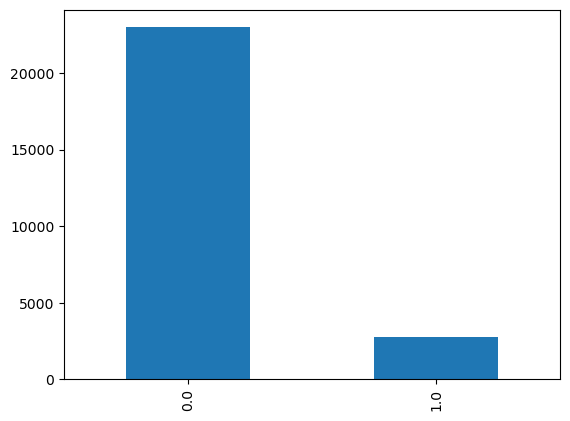

In [53]:
plot_y = pd.DataFrame(y_train, columns = ['Weather'])
after_processed = plot_y['Weather'].value_counts().plot(kind='bar')

## Light BGM

In [54]:
# lg = lgb.LGBMClassifier(silent=False)
# param_dist = {"max_depth": [3,4,5,6,7,8,9,10],
#               "learning_rate" : [0.01,0.05,0.1],
#               "num_leaves": [300,900],
#               "n_estimators": [200]
#              }
# grid_search = GridSearchCV(lg, n_jobs=8, param_grid=param_dist, cv = 3, scoring="f1", verbose=5)

In [55]:
# grid_search.fit(x_train_std,y_train)
# grid_search.best_estimator_

In [62]:
lbgm=lgb.LGBMClassifier(max_depth=10, n_estimators=200, scale_pos_weight=4, num_leaves=20)

In [63]:
lbgm.fit(x_train_std,y_train)

LGBMClassifier(max_depth=10, n_estimators=200, num_leaves=20,
               scale_pos_weight=4)

In [64]:
y_pred_lbgm = lbgm.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_lbgm))
print('f1-score: %f' % f1_score(y_val, y_pred_lbgm))

Accuracy: 0.862897
f1-score: 0.452024


<AxesSubplot:>

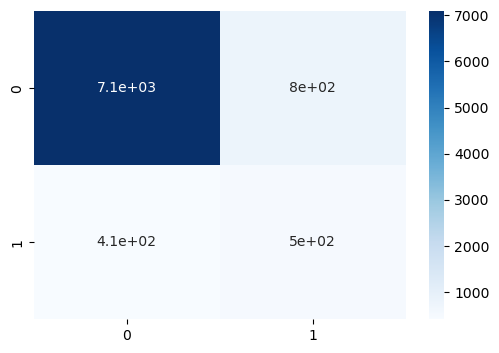

In [65]:
cm=confusion_matrix(y_val,y_pred_lbgm)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues')

## Craete Ans 

In [60]:
ans_pred = lbgm.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')

In [61]:
# temp_1 = pd.DataFrame(process_date[:train_end_idx],columns = ['Y','M','D'])
# temp_2 = pd.DataFrame(process_date[train_end_idx:],columns = ['Y','M','D'])
# process_date = pd.concat([temp_1, temp_2], sort=False)  
# df = pd.concat([df, process_date], axis=1,sort=False)

# temp_1 = pd.DataFrame(data_wind[:train_end_idx],columns = ['w1','w2','w3'])
# temp_2 = pd.DataFrame(data_wind[train_end_idx:],columns = ['w1','w2','w3'])
# data_wind = pd.concat([temp_1, temp_2], sort=False)  
# df = pd.concat([df, data_wind], axis=1,sort=False)